# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*What proportion of Level 10 monsters have higher ATK or DEF than Obelisk the Tormentor, and does statistical analysis show that Obelisk is unusually strong compared to the Level 10 monster population?* <br>

## 📖 My Study 

- *What type of observational study will you be performing? (retrospective)*
- *What population will you be studying?* Level 10 monsters
- *What variables will you focus on in your study?* Attack and defense
- *How do you plan on collecting data?* Using ygoprodeck api
    - *What sampling technique will you use?* census
    - *How will you ensure your data collection is random?* doesn't need to be.
- *What is one source of bias that may impact the results of your study?* None, perhaps the data could be incorrect or outdated, which would lead to certain cards potentially not being included, but otherwise there isn't a source of bias.

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [2]:
# Collect your data here
import requests
import pandas as pd

# --------------------------------------------------------------------
# 1. Fetch all Level 10 monsters from YGOProDeck
# --------------------------------------------------------------------

base_url = "https://db.ygoprodeck.com/api/v7/cardinfo.php"
params = {"level": 10}

response = requests.get(base_url, params=params)
data = response.json()["data"]

# Extract monsters that HAVE atk/def stats (some unusual cards might not)
cards = []
for card in data:
    if "atk" in card and "def" in card:
        cards.append({
            "name": card["name"],
            "atk": card["atk"],
            "def": card["def"],
            "race": card.get("race"),
            "attribute": card.get("attribute")
        })

df = pd.DataFrame(cards)
df.head()

# Getting Obelisk
params_obelisk = {"name": "Obelisk the Tormentor"}

obelisk_response = requests.get(base_url, params=params_obelisk)
obelisk = obelisk_response.json()["data"][0]

obelisk_atk = obelisk["atk"]
obelisk_def = obelisk["def"]

obelisk_stats = {
    "name": obelisk["name"],
    "atk": obelisk_atk,
    "def": obelisk_def
}

obelisk_stats

{'name': 'Obelisk the Tormentor', 'atk': 4000, 'def': 4000}

In [3]:
# Call info() here
df.info()
df["higher_atk"] = df["atk"] > obelisk_atk
df["higher_def"] = df["def"] > obelisk_def

df.head()

prop_atk = df["higher_atk"].mean()
prop_def = df["higher_def"].mean()

prop_atk, prop_def


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       300 non-null    object
 1   atk        300 non-null    int64 
 2   def        300 non-null    int64 
 3   race       300 non-null    object
 4   attribute  300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


(0.03, 0.01)

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [7]:
import scipy.stats as stats

# Calculate percentile rank of Obelisk's ATK and DEF
atk_percentile = stats.percentileofscore(df["atk"], obelisk_atk)
def_percentile = stats.percentileofscore(df["def"], obelisk_def)

atk_percentile, def_percentile

(92.0, 95.16666666666666)

In [8]:
import numpy as np

# Mean and standard deviation
atk_mean = df["atk"].mean()
atk_std  = df["atk"].std()

def_mean = df["def"].mean()
def_std  = df["def"].std()

# Z-score formula
atk_z = (obelisk_atk - atk_mean) / atk_std
def_z = (obelisk_def - def_mean) / def_std

atk_z, def_z

(1.0762146092897416, 1.4521455363201219)

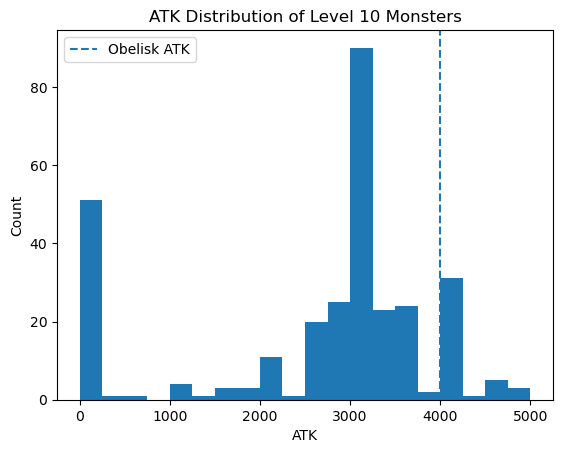

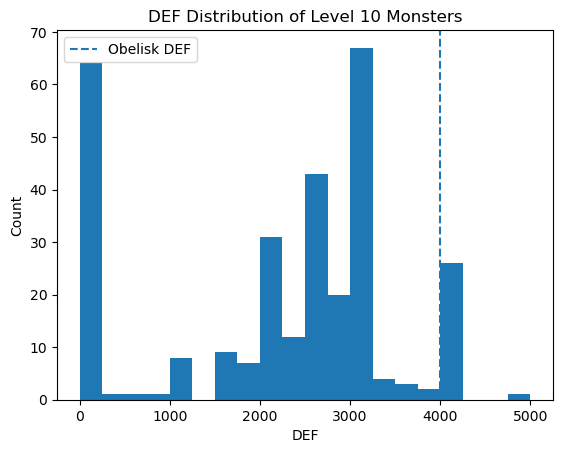

In [9]:
import matplotlib.pyplot as plt

# -------------------
# Histogram of ATK
# -------------------
plt.hist(df["atk"], bins=20)
plt.axvline(obelisk_atk, linestyle="--", label="Obelisk ATK")
plt.title("ATK Distribution of Level 10 Monsters")
plt.xlabel("ATK")
plt.ylabel("Count")
plt.legend()
plt.show()

# -------------------
# Histogram of DEF
# -------------------
plt.hist(df["def"], bins=20)
plt.axvline(obelisk_def, linestyle="--", label="Obelisk DEF")
plt.title("DEF Distribution of Level 10 Monsters")
plt.xlabel("DEF")
plt.ylabel("Count")
plt.legend()
plt.show()

## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

The proportion of level 10 monsters with higher attack than Obelisk the tormentor is 3%, and the proportion of level 10 monsters with higher defense than obelisk is 1%. This means that Obelisk is in the top 97% for attack and 99% for defence. Its attack z score is 1.07 meaning it is more than 1 standard deviation more than the average level 10 monster, and its defense's z score is 1.45, meaning it is also more than 1 standard deviation above the average level 10 monster. These scores mean both of Obelisk's stats are a good bit higher than most cards, though not extreme or an outlier. Obelisk's attack is in the 92nd percentile of all level 10 monsters and its defense is in the 95nd percentile of all level 10 monsters. This means that 92% of all level 10 monsters have either less attack or equal attack to obelisk, and 95% of all level 10 monsters have defense equal to or less than obelisk.